In [1]:
from tensorflow import keras

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5998 - accuracy: 0.8436 - val_loss: 0.3118 - val_accuracy: 0.9120
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2867 - accuracy: 0.9175 - val_loss: 0.2458 - val_accuracy: 0.9310
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2326 - accuracy: 0.9345 - val_loss: 0.2096 - val_accuracy: 0.9398
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1963 - accuracy: 0.9447 - val_loss: 0.1788 - val_accuracy: 0.9476
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1704 - accuracy: 0.9522 - val_loss: 0.1588 - val_accuracy: 0.9528
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1501 - accuracy: 0.9573 - val_loss: 0.1434 - val_accuracy: 0.9570
Epoch 7/10
60000/60000 [==============================] 

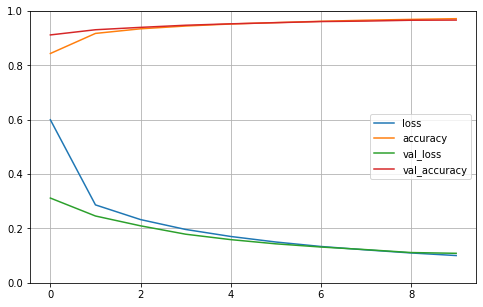

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("a.png")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.6302 - accuracy: 0.8453 - val_loss: 0.3478 - val_accuracy: 0.9057
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3291 - accuracy: 0.9086 - val_loss: 0.2847 - val_accuracy: 0.9208
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2808 - accuracy: 0.9214 - val_loss: 0.2542 - val_accuracy: 0.9284
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2500 - accuracy: 0.9300 - val_loss: 0.2298 - val_accuracy: 0.9372
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2266 - accuracy: 0.9367 - val_loss: 0.2145 - val_accuracy: 0.9391
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2075 - accuracy: 0.9417 - val_loss: 0.1956 - val_accuracy: 0.9462
Epoch 7/10
60000/60000 [==============================] 

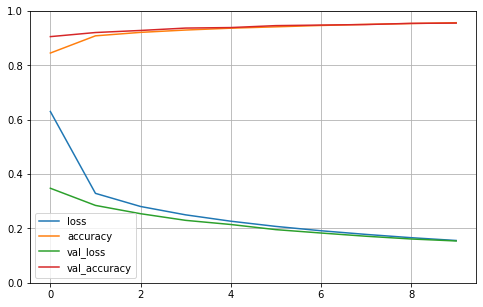

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("b1.png")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 1.2187 - accuracy: 0.6098 - val_loss: 0.3317 - val_accuracy: 0.8974
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2372 - accuracy: 0.9291 - val_loss: 0.1766 - val_accuracy: 0.9467
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1487 - accuracy: 0.9557 - val_loss: 0.1391 - val_accuracy: 0.9577
Epoch 4/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.1101 - val_accuracy: 0.9664
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.1088 - val_accuracy: 0.9661
Epoch 6/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0668 - accuracy: 0.9803 - val_loss: 0.0944 - val_accuracy: 0.9716
Epoch 7/10
60000/60000 [=========================

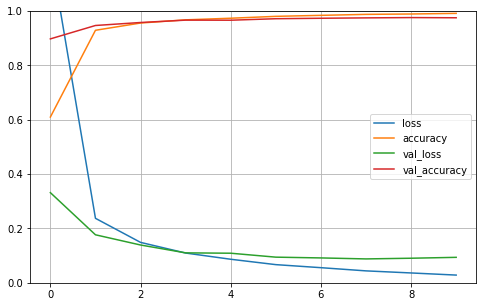

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("b2.png")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5686 - accuracy: 0.8506 - val_loss: 0.2969 - val_accuracy: 0.9172
Epoch 2/3
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2747 - accuracy: 0.9225 - val_loss: 0.2334 - val_accuracy: 0.9347
Epoch 3/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2240 - accuracy: 0.9372 - val_loss: 0.2017 - val_accuracy: 0.9412


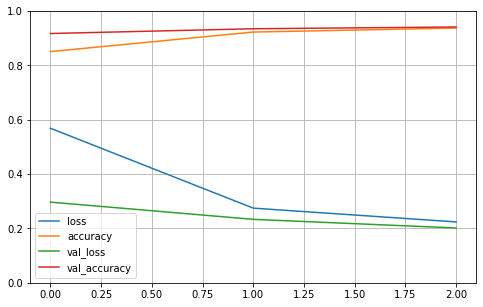

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=3, validation_data=(X_test,y_test))

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("c1.png")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5843 - accuracy: 0.8502 - val_loss: 0.2999 - val_accuracy: 0.9155
Epoch 2/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2793 - accuracy: 0.9213 - val_loss: 0.2373 - val_accuracy: 0.9315
Epoch 3/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2285 - accuracy: 0.9352 - val_loss: 0.2013 - val_accuracy: 0.9418
Epoch 4/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1954 - accuracy: 0.9443 - val_loss: 0.1808 - val_accuracy: 0.9474
Epoch 5/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1706 - accuracy: 0.9514 - val_loss: 0.1613 - val_accuracy: 0.9521
Epoch 6/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1509 - accuracy: 0.9576 - val_loss: 0.1490 - val_accuracy: 0.9553
Epoch 7/30
60000/60000 [==============================] 

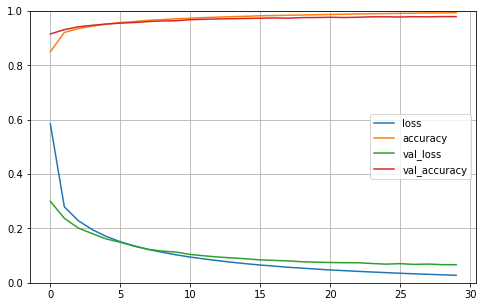

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("c2.png")
plt.show()